In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [2]:
df = pd.read_csv("drug200.csv")

df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.shape

(200, 6)

In [4]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [7]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [8]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## EDA

<Axes: xlabel='Drug', ylabel='count'>

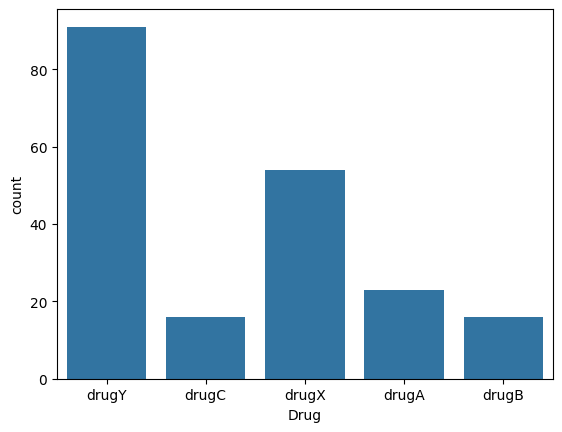

In [9]:
sns.countplot(data = df, x='Drug')

<Axes: xlabel='Sex', ylabel='count'>

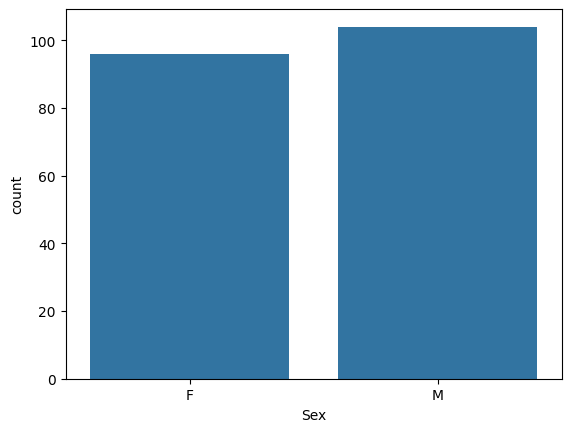

In [20]:
sns.countplot(data = df, x='Sex')

<Axes: xlabel='BP', ylabel='count'>

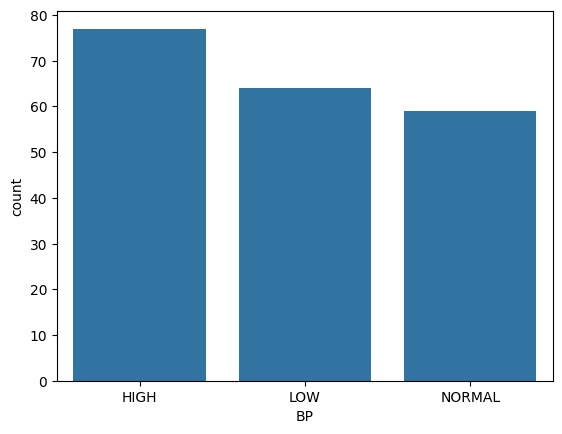

In [21]:
sns.countplot(data=df, x= 'BP')

<Axes: xlabel='Age', ylabel='Drug'>

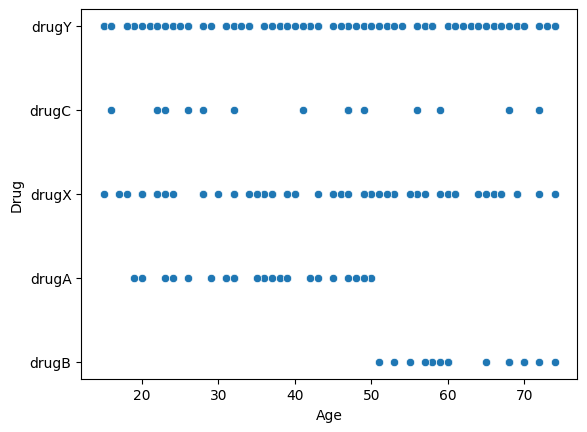

In [23]:
sns.scatterplot(data=df, x="Age", y="Drug")

<Axes: xlabel='Drug', ylabel='count'>

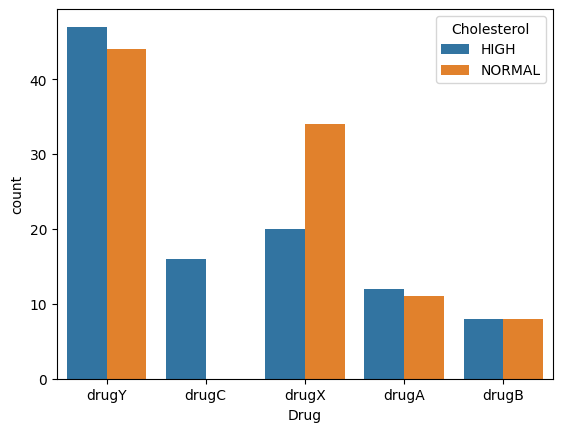

In [24]:
sns.countplot(data=df, x = "Drug", hue="Cholesterol")

<Axes: xlabel='Cholesterol', ylabel='count'>

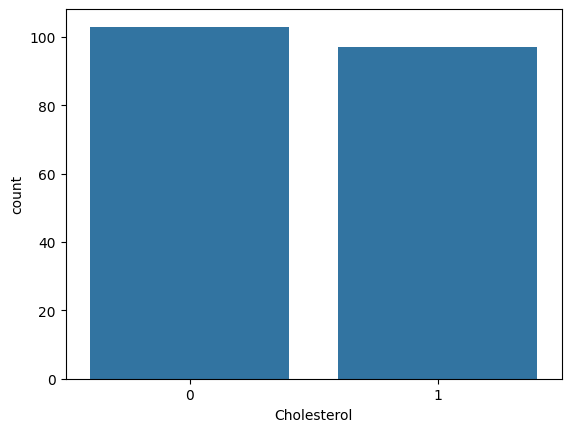

In [49]:
sns.countplot(data = df, x='Cholesterol')

## Feature Encoding 

### Label encoding

In [27]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df[["Sex"]])
df["BP"] = le.fit_transform(df[["BP"]])
df["Cholesterol"] = le.fit_transform(df[["Cholesterol"]])

C:\Users\acer\anaconda3\envs\myenv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acer\anaconda3\envs\myenv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\acer\anaconda3\envs\myenv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


Sex: -----> 0 =Female 1 = Male
BP: -----> 0 = High 1 = Low 2 = Normal
Cholesterol: -----> 0 = High 1 = Normal

### One hot encoding

In [31]:
OHE = OneHotEncoder()
OHE_df = pd.DataFrame(OHE.fit_transform(df[['Drug']]).toarray(), columns = ['DrugA', 'DrugB', 'DrugC', 'DrugX', 'DrugY'])

In [32]:
OHE_df.head()

,DrugA,DrugB,DrugC,DrugX,DrugY
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [35]:
encoded_data = df.join(OHE_df, how="left")

In [37]:
encoded_data.drop(["Drug"], axis=1, inplace=True)

In [38]:
encoded_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,DrugA,DrugB,DrugC,DrugX,DrugY
0,23,0,0,0,25.355,0.0,0.0,0.0,0.0,1.0
1,47,1,1,0,13.093,0.0,0.0,1.0,0.0,0.0
2,47,1,1,0,10.114,0.0,0.0,1.0,0.0,0.0
3,28,0,2,0,7.798,0.0,0.0,0.0,1.0,0.0
4,61,0,1,0,18.043,0.0,0.0,0.0,0.0,1.0


## Split the data

In [39]:
X = encoded_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
Y = encoded_data[["DrugA", "DrugB", "DrugC", "DrugX", "DrugY"]]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.25, shuffle=True, random_state=42)

## Decision Tree

In [41]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.625, 0.9, 'x[4] <= 14.829\ngini = 0.278\nsamples = 150\nvalue = [[133, 17]\n[138, 12]\n[138, 12]\n[109, 41]\n[82, 68]]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.266\nsamples = 82\nvalue = [[65, 17]\n[70, 12]\n[70, 12]\n[41, 41]\n[82, 0]]'),
 Text(0.25, 0.5, 'x[0] <= 51.5\ngini = 0.194\nsamples = 29\nvalue = [[12, 17]\n[17, 12]\n[29, 0]\n[29, 0]\n[29, 0]]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [[0, 17]\n[17, 0]\n[17, 0]\n[17, 0]\n[17, 0]]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [[12, 0]\n[0, 12]\n[12, 0]\n[12, 0]\n[12, 0]]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\ngini = 0.14\nsamples = 53\nvalue = [[53, 0]\n[53, 0]\n[41, 12]\n[12, 41]\n[53, 0]]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\ngini = 0.199\nsamples = 26\nvalue = [[26, 0]\n[26, 0]\n[14, 12]\n[12, 14]\n[26, 0]]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [[12, 0]\n[12, 0]\n[0, 12]\n[12, 0]\n[12, 0]]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [[14, 0]\n[14, 0]\n[14, 0]\n[0, 14]\n[14

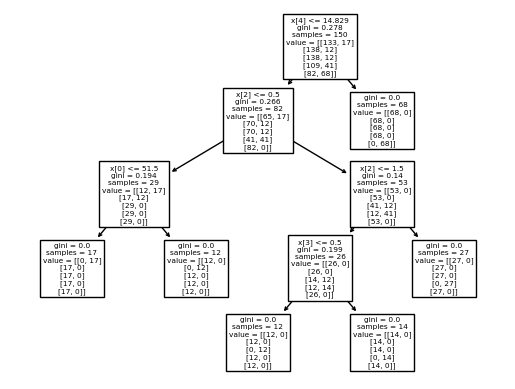

In [42]:
plot_tree(dt)

In [48]:
# Accuracy
accuracy = accuracy_score(y_test, dt.predict(x_test))
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = multilabel_confusion_matrix(y_test, dt.predict(x_test))
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, dt.predict(x_test))
print('Classification Report:')
print(class_report)

Accuracy: 0.98
Confusion Matrix:
[[[43  1]
  [ 0  6]]

 [[46  0]
  [ 1  3]]

 [[46  0]
  [ 0  4]]

 [[37  0]
  [ 0 13]]

 [[27  0]
  [ 0 23]]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        23

   micro avg       0.98      0.98      0.98        50
   macro avg       0.97      0.95      0.96        50
weighted avg       0.98      0.98      0.98        50
 samples avg       0.98      0.98      0.98        50

